In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

In [2]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve

In [3]:
#from matplotlib import rc
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                     'font.family': 'Serif',
                     #'font.family': 'Droid Sans'
                      'figure.figsize': (4, 3.8)
                    })

red = "#CA0020"
orange = "#F97100" 
blue = "#0571b0"

In [4]:
target_rows = 1e6

msun_binaries = pd.DataFrame()

iteration = 1

while len(msun_binaries) < target_rows:
    sample = InitialBinaryTable.sampler(
        'independent',
        final_kstar1=range(15),
        final_kstar2=range(15),
        SF_start=6652, #5 * 1e3,
        SF_duration=0.0,
        met=0.02,
        size=1e6,
        primary_model="kroupa01", 
        porb_model="raghavan10", #"sana12",
        ecc_model="circular", #"sana12",
        binfrac_model=1.0 #"offner22"
    )

    initial_binaries = sample[0]

    filtered = initial_binaries[(initial_binaries['mass_1'] < 8) & (initial_binaries['mass_1'] > 2) & (initial_binaries['mass_2'] < 1.3) & (initial_binaries['mass_2'] > 0.7)]
    filtered.loc[:, 'mass_2'] = 1.0
    filtered.loc[:, 'mass0_2'] = 1.0
    
    print('iteration', iteration, ', binaries:', len(msun_binaries))
    iteration += 1 
    
    msun_binaries = pd.concat([msun_binaries, filtered])

msun_binaries = msun_binaries.iloc[:int(target_rows)]

iteration 1 , binaries: 0
iteration 2 , binaries: 12620
iteration 3 , binaries: 25410
iteration 4 , binaries: 38186
iteration 5 , binaries: 51030
iteration 6 , binaries: 63739
iteration 7 , binaries: 76567
iteration 8 , binaries: 89351
iteration 9 , binaries: 102206
iteration 10 , binaries: 115163
iteration 11 , binaries: 128004
iteration 12 , binaries: 140803
iteration 13 , binaries: 153766
iteration 14 , binaries: 166683
iteration 15 , binaries: 179453
iteration 16 , binaries: 192196
iteration 17 , binaries: 205105
iteration 18 , binaries: 217876
iteration 19 , binaries: 230660
iteration 20 , binaries: 243312
iteration 21 , binaries: 256089
iteration 22 , binaries: 268872
iteration 23 , binaries: 281808
iteration 24 , binaries: 294579
iteration 25 , binaries: 307327
iteration 26 , binaries: 320149
iteration 27 , binaries: 333048
iteration 28 , binaries: 345812
iteration 29 , binaries: 358620
iteration 30 , binaries: 371350
iteration 31 , binaries: 384251
iteration 32 , binaries: 3972

In [5]:
msun_binaries

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,tphysf,mass0_1,mass0_2,...,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,binfrac
146,1.0,1.0,3.476639,1.0,8.891103e+05,0.0,0.02,6652.0,3.476639,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
252,1.0,1.0,3.062475,1.0,7.894217e+04,0.0,0.02,6652.0,3.062475,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
286,1.0,1.0,3.932594,1.0,9.502095e+04,0.0,0.02,6652.0,3.932594,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
342,1.0,1.0,2.357246,1.0,4.750751e+05,0.0,0.02,6652.0,2.357246,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
428,1.0,1.0,4.308632,1.0,8.167678e+01,0.0,0.02,6652.0,4.308632,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039390,1.0,1.0,2.324269,1.0,4.233414e+07,0.0,0.02,6652.0,2.324269,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1039426,1.0,1.0,2.087979,1.0,7.375050e+02,0.0,0.02,6652.0,2.087979,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1039438,1.0,1.0,4.401867,1.0,2.451710e+05,0.0,0.02,6652.0,4.401867,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1039467,1.0,1.0,6.102578,1.0,1.920413e+03,0.0,0.02,6652.0,6.102578,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
msun_binaries.columns

Index(['kstar_1', 'kstar_2', 'mass_1', 'mass_2', 'porb', 'ecc', 'metallicity',
       'tphysf', 'mass0_1', 'mass0_2', 'rad_1', 'rad_2', 'lum_1', 'lum_2',
       'massc_1', 'massc_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2', 'renv_1',
       'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2', 'bacc_1',
       'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2', 'tms_1', 'tms_2',
       'bhspin_1', 'bhspin_2', 'tphys', 'binfrac'],
      dtype='object')

In [7]:
for column in msun_binaries.columns:
    unique_values = msun_binaries[column].unique()
    print(f"Column: {column}")
    print("Unique Values:", unique_values)
    print("-" * 40)

Column: kstar_1
Unique Values: [1.]
----------------------------------------
Column: kstar_2
Unique Values: [1.]
----------------------------------------
Column: mass_1
Unique Values: [3.47663902 3.06247485 3.93259364 ... 4.40186659 6.10257836 3.21431189]
----------------------------------------
Column: mass_2
Unique Values: [1.]
----------------------------------------
Column: porb
Unique Values: [8.89110320e+05 7.89421690e+04 9.50209488e+04 ... 2.45170995e+05
 1.92041332e+03 1.29508650e+08]
----------------------------------------
Column: ecc
Unique Values: [0.]
----------------------------------------
Column: metallicity
Unique Values: [0.02]
----------------------------------------
Column: tphysf
Unique Values: [6652.]
----------------------------------------
Column: mass0_1
Unique Values: [3.47663902 3.06247485 3.93259364 ... 4.40186659 6.10257836 3.21431189]
----------------------------------------
Column: mass0_2
Unique Values: [1.]
----------------------------------------
Colum

In [8]:
msun_binaries.to_csv('msun_binaries-1M-r10.csv', index=False)

In [4]:
msun_binaries = pd.read_csv('msun_binaries-1M-r10.csv')

In [5]:
msun_binaries.shape

(1000000, 38)

In [6]:
msun_binaries.columns

Index(['kstar_1', 'kstar_2', 'mass_1', 'mass_2', 'porb', 'ecc', 'metallicity',
       'tphysf', 'mass0_1', 'mass0_2', 'rad_1', 'rad_2', 'lum_1', 'lum_2',
       'massc_1', 'massc_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2', 'renv_1',
       'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2', 'bacc_1',
       'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2', 'tms_1', 'tms_2',
       'bhspin_1', 'bhspin_2', 'tphys', 'binfrac'],
      dtype='object')

Text(0, 0.5, 'mass 2')

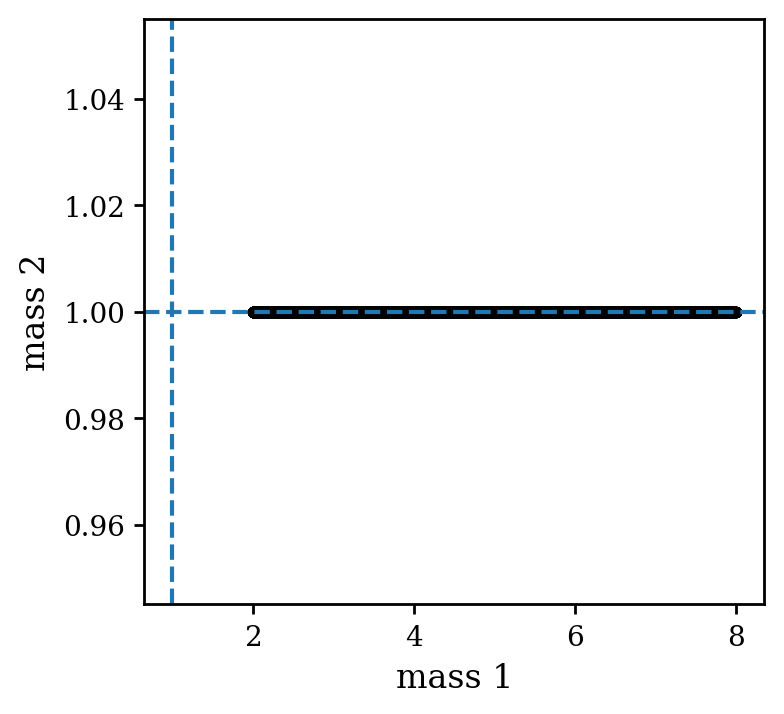

In [7]:
plt.plot(msun_binaries.mass_1, msun_binaries.mass_2, 'k.')
plt.axvline(1, ls='--')
plt.axhline(1, ls='--')
plt.xlabel('mass 1')
plt.ylabel('mass 2')

[]

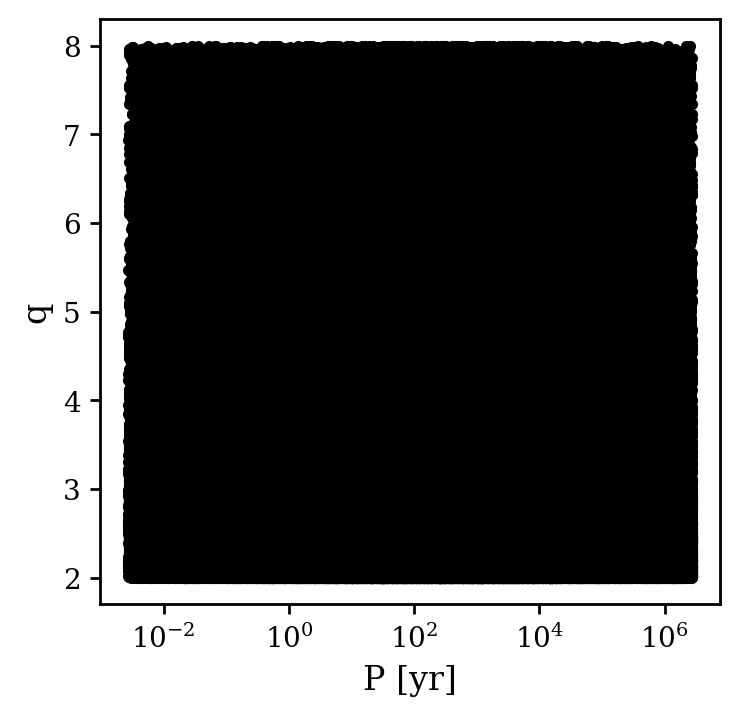

In [8]:
plt.plot(msun_binaries.porb/365, msun_binaries.mass_1/msun_binaries.mass_2, 'k.')
plt.xlabel('P [yr]')
plt.ylabel('q')
plt.semilogx()
#plt.semilogy()

In [9]:
msun_binaries['tphysf'] = 6652

In [15]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 
           'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 
           'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 
           'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 
           'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=msun_binaries, BSEDict=BSEDict)

In [16]:
bpp.to_csv('bpp_1M-r10.csv', index=False)
bcm.to_csv('bcm_1M-r10.csv', index=False)

In [17]:
print("all done!")

all done!


In [18]:
bpp = pd.read_csv('bpp_1M-r10.csv')
bcm = pd.read_csv('bcm_1M-r10.csv')

Text(0, 0.5, 'Luminosity [L$_\\odot$]')

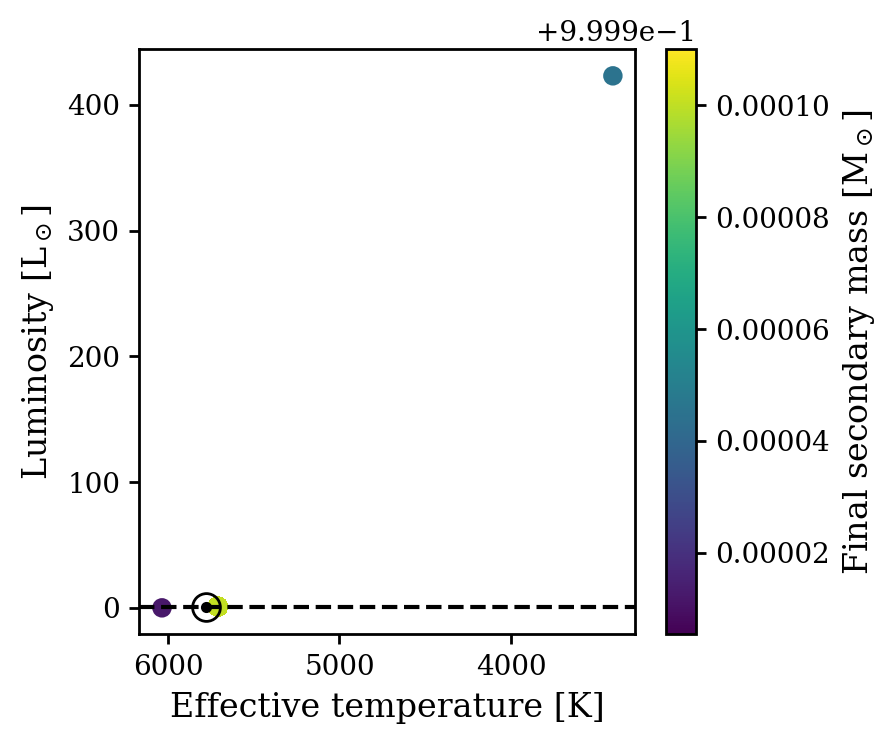

In [19]:
grouped = bpp.groupby('bin_num')
last_lum = np.array(grouped['lum_2'].last().tolist())
last_teff = np.array(grouped['teff_2'].last().tolist())
last_mass = np.array(grouped['mass_2'].last().tolist())

idx = (last_mass >= 0.9999) & (last_mass <= 1.00001)

plt.scatter(last_teff[idx], last_lum[idx], c=last_mass[idx])
plt.colorbar(label=r'Final secondary mass [M$_\odot$]')

plt.plot(5777, 1, 'k.')
plt.plot(5777, 1, 'ko', mfc='none', ms=10)
plt.axhline(1, ls='--', c='k')
plt.gca().invert_xaxis()
#plt.semilogx()
#plt.semilogy()
plt.xlabel('Effective temperature [K]')
plt.ylabel(r'Luminosity [L$_\odot$]')

In [21]:
len(last_lum[idx])

139832

In [10]:
from cosmic.evolve import MultiPool

In [12]:
BSEDict = {'xi': 0.5, 'bhflag': 1, 'neta': 0.1, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 
           'epsnov': 0.001, 'hewind': 0.1, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 
           'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 
           'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 
           'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=msun_binaries, BSEDict=BSEDict, nproc=16)

In [13]:
bpp.to_csv('bpp_1M-r10-neta1-xi05.csv', index=False)
bcm.to_csv('bcm_1M-r10-neta1-xi05.csv', index=False)